In [28]:
C.<x>=PolynomialRing(CC)
D.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
S = PowerSeriesRing(QQ,'x', default_prec=300)
L=LaurentSeriesRing(QQ,'x', default_prec=300)
#S.<x,y>=PowerSeriesRing(QQ,default_prec=300)
# Using "R = PolynomialRing(QQ,'x')" produces an error.
# Yet using S as defined here is fine (see definition of Fraleigh4 below)
# But S = PowerSeriesRing(QQ,'x','y') also produces an error.
R.<x> = PolynomialRing(QQ)
Scplx= PowerSeriesRing(CC,'x',default_prec=300)

def ordP(n,p):
    fct=factor(n)
    lf=len(fct)
    for k in [0..lf-1]:
        prime=fct[k][0]
        if prime==p:
            answer=fct[k][1]
            return answer
    return 0

def division(dividend, divisor) : 
    quotient=(dividend._maxima_().divide(divisor).sage())[0] 
    remainder=(dividend._maxima_().divide(divisor).sage())[1] 
    return (quotient,remainder)

def polynomialdivision(dividend, divisor):
    q,r = dividend.maxima_methods().divide(divisor)
    return (q,r)

def pochhammer(x,n):
    return product ([x+k for k in [0..n-1]])
def cRaleigh2(alpha,beta,nu):
    pchhmrA = pochhammer(alpha,nu)
    pchhmrB = pochhammer(beta,nu)
    fnu=factorial(nu)
    answer = D(pchhmrA*pchhmrB/fnu^2)
    return answer
def term(alpha,beta,p):
    return D(1/(alpha + p) + 1/(beta + p) - 2/(1 + p))
def eRaleigh(alpha, beta, nu):
    return D(sum([term(alpha, beta, p) for p in [0..nu - 1]]))
def FstarRaleigh2(alpha,beta,u,terms):
    fsr = sum([cRaleigh2(alpha, beta, nu)*eRaleigh(alpha,beta,nu)*u^nu for nu in [1..terms]])
    return D(fsr)
def Fraleigh2(alpha,beta,u,terms): 
    return D(sum([cRaleigh2(alpha,beta,nu)*u^nu for nu in [0..terms]]))
def FstarRaleigh3(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fsr2 = FstarRaleigh2(alpha,beta,x,n)
    return D(fsr2)
def Fraleigh4(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fr2 = Fraleigh2(alpha,beta,x,n)
    return D(fr2)

def exNo3c(n,m):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.

def exNo3cX(n,m,x):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.

def J(n,m):
    exn = exNo3c(n+2,m)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.

def JX(n,m,x):
    exn = exNo3cX(n+2,m,x)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.


def normalJ(n,m):
    f = J(n,m)
    return f.truncate(n+1)

def normalJX(n,m,x):
    f = JX(n,m,x)
    return f.truncate(n+1)

def Jcoefficient(n,m):
    f = J(n+2,m)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]

def JXcoefficient(n,m,x):
    f = JX(n+2,m,x)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]

def xjNewStep(n,m): 
    f=J(n,m)
    fl=f.list()
    return (sum(c*x**i*(m**3*2**6)**i for i,c in enumerate(fl)))

def xjNew(n,m):
    return xjNewStep(n-1,m)

def xjNewCoefficient(n,m):
    if n>0:return (xjNew(n,m)-xjNew(n-1,m))/x^n
    if n==0:return 1
    
def xjNewTest(n,m):
    return D(xjNewStep(n-1,m))

def j(n,m):return xjNew(n,m)/x

def H4(n,m):
    jay=j(n+1,m)
    djay=x*derivative(jay,x) # bc variable is tau, not x; chain rule.
    numerator = djay^2
    denominator = jay*(jay-2^6*m^3)
    return ((S(numerator/denominator)^(1/(m-2))).O(n+1)).polynomial()

def H6(n,m): #different than in draft 4mar21 and Mathematica.
    def base6(n,m):
        jay=j(n+1,m)
        num=(x*derivative(jay,x))^m # chain rule; variable is tau not x.
        den = expand(jay^(m-1)*(j(n+1,m)-2^6*m^3))
        return L((-1)^m*(num/den)).O(n+1)
    return (S(base6(n,m)^(1/(m-2))).polynomial())


def weight4mDeltaInfty(n,m): 
    # definition 9.1 in the paper to power (m-2)
    # so, per remark 4 in paper,
    # the weight is 4m for each m.
    jay=J(n,m)
    djay=x*derivative(jay,x)
    numerator=L(djay^(2*m))
    denominator=L(jay^(2*m-2)*(jay-1)^m)
    base=L(numerator/denominator)
    sbase=S(base)
    dbase=D(sbase).truncate(n+1)
    dl=dbase.list()
    dd=dbase.degree()
    answer0=sum(dl[k]*x^k for k in [0..dd])
    al=answer0.list()
    ad=answer0.degree()
    notzero=[]
    for entry in al:
        if (entry!=0):notzero=notzero+[entry]
    leadingterm=notzero[0]
    answer=sum(al[k]*x^k/leadingterm for k in [0..ad])
    return answer

def normalizedWeight4mDeltaInfty(n,m):
    return weight4mDeltaInfty(n+m-2,m)/x^(m-2)


def weight4mDeltaInftyStrike(n,m): 
    # substitute 2^6*m^3*x for x in def 9.1; not
    # yet defined in draft  21h28jul21
    f=weight4mDeltaInfty(n,m)
    fl=f.list()
    df=f.degree()
    sm=sum(fl[k]*(x*m^3*2^6)^k for k in [0..df])
    dsm=sm.degree()
    sml=sm.list()
    notzero=[]
    for entry in sml:
        if (entry!=0):notzero=notzero+[entry]
    leadingterm=notzero[0]
    sm2=sum(fl[k]*(x*m^3*2^6)^k/leadingterm for k in [0..dsm])
    return sm2

def normalizedWeight4mDeltaInftyStrike(n,m):
    return weight4mDeltaInftyStrike(n+m-2,m)/x^(m-2)
    
def polynomialCoefficient(n,poly):
    return poly.list()[n]
def factorpairToFactor(factorpair):
    (monomial,exponent)=factorpair
    return monomial^exponent
def numericalfactor(polynomial):
    fp=polynomial.factor()
    lst=[factorpairToFactor(factorpair) for factorpair in fp]
    return polynomial/product(lst)
def lastfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.last())
def reduced(polynomial):
    return numericalfactor(polynomial)*lastfactor(polynomial)
def stripQuotationMarks(string):
    var('x')
    return sage_eval(string,locals={'x':x})

def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)

def last(list):return list[-1]


def polynomialExponentList(polynomial):
    pel=[]
    fp=polynomial.factor()
    lf=len(fp)
    for n in [0..lf-1]:
        part = fp[n]
        (base,exponent) = part
        pel=pel+[exponent]
    return pel

In [6]:
for m in [3..6]:
    print "-----------------------------------------------------------------------"
    print  normalizedWeight4mDeltaInfty(5,m)
    print
    print normalizedWeight4mDeltaInftyStrike(5,m)

-----------------------------------------------------------------------
-7/17832200896512*x^5 + 805/1486016741376*x^4 - 23/80621568*x^3 + 7/82944*x^2 - 1/72*x + 1

-6048*x^5 + 4830*x^4 - 1472*x^3 + 252*x^2 - 24*x + 1
-----------------------------------------------------------------------
147/34359738368*x^5 - 325/1073741824*x^4 - 1/262144*x^3 + 11/8192*x^2 - 1/16*x + 1

4932501504*x^5 - 85196800*x^4 - 262144*x^3 + 22528*x^2 - 256*x + 1
-----------------------------------------------------------------------
230691321/20480000000000000*x^5 + 6089013/3276800000000*x^4 - 3101/16000000*x^3 + 189/25600*x^2 - 27/200*x + 1

369106113600*x^5 + 7611266250*x^4 - 99232000*x^3 + 472500*x^2 - 1080*x + 1
-----------------------------------------------------------------------
-7/8503056*x^5 + 901/22674816*x^4 - 187/157464*x^3 + 7/324*x^2 - 2/9*x + 1

-415615395299328*x^5 + 1451162075136*x^4 - 3137339392*x^3 + 4128768*x^2 - 3072*x + 1


In [9]:
poly=D(x*normalizedWeight4mDeltaInftyStrike(100,3))
data=[]
ls=poly.list()
for n in [1..len(ls)-1]:
    data=data+[polynomialCoefficient(n,poly)-nieburTau(n)]
print data

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
import time
import pickle
wfile = open('/Users/barrybrent/run14aug21no40test.txt','w') 
data=[]
start=time.time()
for m in [3..33]:
    ds=normalizedWeight4mDeltaInftyStrike(10,m)
    data=data+[[m,ds]]
    finish=time.time()
    print([m,finish-start])
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()


[3, 0.11812782287597656]
[4, 0.17715096473693848]
[5, 0.31065797805786133]
[6, 0.40938782691955566]
[7, 0.5555579662322998]
[8, 0.6310758590698242]
[9, 0.796191930770874]
[10, 0.9224069118499756]
[11, 1.089601993560791]
[12, 1.2246358394622803]
[13, 1.406463861465454]
[14, 1.5462579727172852]
[15, 1.7590959072113037]
[16, 1.851491928100586]
[17, 2.0489978790283203]
[18, 2.2081480026245117]
[19, 2.411902904510498]
[20, 2.579828977584839]
[21, 2.825345993041992]
[22, 2.987522840499878]
[23, 3.2066478729248047]
[24, 3.3767199516296387]
[25, 3.616741895675659]
[26, 3.8029098510742188]
[27, 4.0690178871154785]
[28, 4.276046991348267]
[29, 4.532176971435547]
[30, 4.7599709033966064]
[31, 5.022558927536011]
[32, 5.173756837844849]
[33, 5.507852792739868]


In [8]:
import pickle
rfile = open('/Users/barrybrent/run14aug21no40test.txt','r') 
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
test=[]
for n in [0..9]:
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=s[k][1]
        cf=polynomialCoefficient(n,poly)
        data=data+[(m,cf)]
    rl=R.lagrange_polynomial(data)
    rl=D(rl)
    print (n,rl.degree())
 #   test=test+[[n,rl]]
#wfile = open('/Users/barrybrent/run12aug21no2.txt','w') 
#t = pickle.dumps(str(test))
#wfile.write(t)
#wfile.close()

(0, 0)
(1, 4)
(2, 8)
(3, 12)
(4, 16)
(5, 20)
(6, 24)
(7, 28)
(8, 30)
(9, 30)


In [2]:
import time
import pickle
wfile = open('/Users/barrybrent/run14aug21no40.txt','w') 
data=[]
start=time.time()
for m in [3..403]:
    ds=normalizedWeight4mDeltaInftyStrike(100,m)
    data=data+[[m,ds]]
    finish=time.time()
    print([m,finish-start])
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

[3, 1.4114751815795898]
[4, 2.4139862060546875]
[5, 4.32428503036499]
[6, 5.321832180023193]
[7, 7.596461057662964]
[8, 9.378778219223022]
[9, 12.065331220626831]
[10, 13.82280707359314]
[11, 16.67746114730835]
[12, 19.238338232040405]
[13, 22.484058141708374]
[14, 24.66856813430786]
[15, 28.597447156906128]
[16, 31.3890540599823]
[17, 35.37547516822815]
[18, 38.27181100845337]
[19, 42.415287017822266]
[20, 46.28216814994812]
[21, 51.288244009017944]
[22, 54.39088010787964]
[23, 59.239723205566406]
[24, 63.79394221305847]
[25, 69.39376401901245]
[26, 73.580491065979]
[27, 79.67662715911865]
[28, 84.99657201766968]
[29, 91.09516501426697]
[30, 96.0829222202301]
[31, 102.54553723335266]
[32, 107.97031712532043]
[33, 115.91768503189087]
[34, 121.1740050315857]
[35, 129.79666900634766]
[36, 137.134104013443]
[37, 145.48462915420532]
[38, 151.4654312133789]
[39, 161.1055190563202]
[40, 169.2285861968994]
[41, 178.54799818992615]
[42, 186.3104522228241]
[43, 196.20967316627502]
[44, 205.4686

/Applications/SageMath-9.1.app/Contents/Resources/sage/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:133: RuntimeWarning: cypari2 leaked 3865128 bytes on the PARI stack


KeyboardInterrupt: 

In [3]:
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

In [4]:
ld=last(data)
lastpoly=D(ld[1])
dg=lastpoly.degree()
m=ld[0]
print(m,dg)


(135, 100)


In [5]:
import pickle
rfile = open('/Users/barrybrent/run14aug21no40.txt','r') 
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
test=[]
for n in [0..33]:
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=s[k][1]
        cf=polynomialCoefficient(n,poly)
        data=data+[(m,cf)]
    rl=R.lagrange_polynomial(data)
    rl=D(rl)
    print (n,rl.degree())
    test=test+[[n,rl]]
wfile = open('/Users/barrybrent/run15aug21no1.txt','w') 
t = pickle.dumps(str(test))
wfile.write(t)
wfile.close()

(0, 0)
(1, 4)
(2, 8)
(3, 12)
(4, 16)
(5, 20)
(6, 24)
(7, 28)
(8, 32)
(9, 36)
(10, 40)
(11, 44)
(12, 48)
(13, 52)
(14, 56)
(15, 60)
(16, 64)
(17, 68)
(18, 72)
(19, 76)
(20, 80)
(21, 84)
(22, 88)
(23, 92)
(24, 96)
(25, 100)
(26, 104)
(27, 108)
(28, 112)
(29, 116)
(30, 120)
(31, 124)
(32, 128)
(33, 132)


('polynomial #', 3)


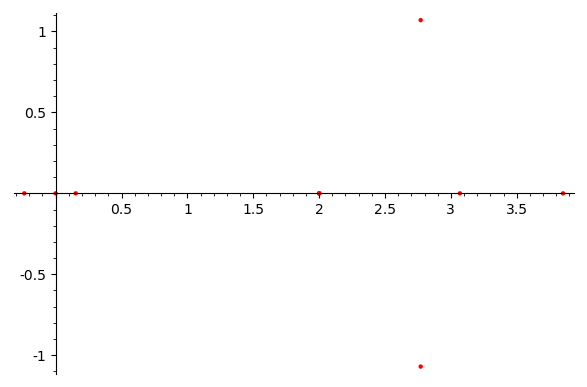

degree:  12
root count:  12


In [6]:
import pickle
rfile = open('/Users/barrybrent/run15aug21no1.txt','r')    # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lengths=[]
for k in [3..3]:
    points=[]
    n=s[k][0]
    print("polynomial #",n)
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    points=[]
    rootcount=0
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        root=[real(root),imaginary(root)]
        points=points+[root]
        rootcount=rootcount+mult
    rootplot=list_plot(points,color='red')
    show(rootplot)
    print "degree: ",poly.degree()
    print "root count: ",rootcount 

-----------------------------------------------------------------------------------
('polynomial #', 3)


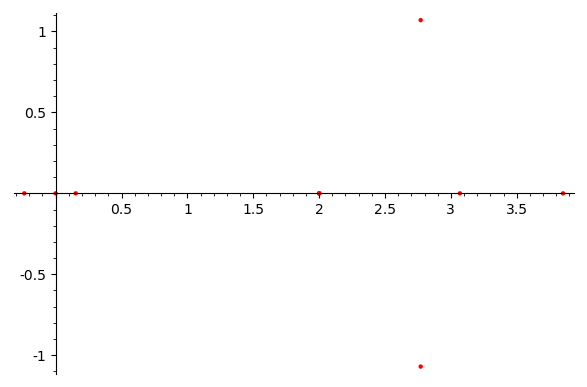

degree:  12
root count:  12
-----------------------------------------------------------------------------------
('polynomial #', 4)


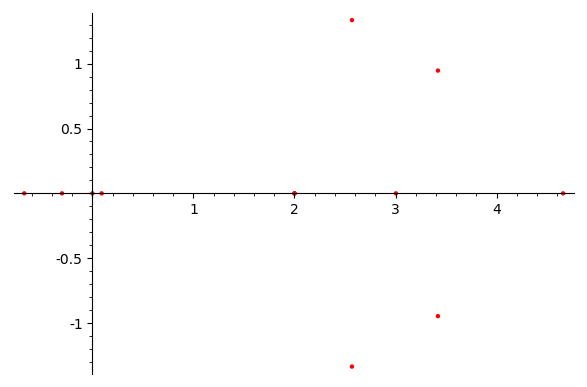

degree:  16
root count:  16
-----------------------------------------------------------------------------------
('polynomial #', 5)


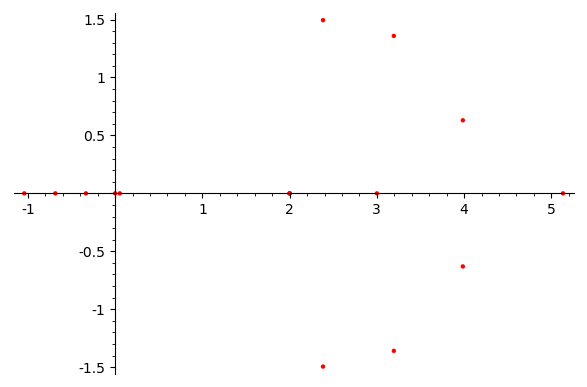

degree:  20
root count:  20
-----------------------------------------------------------------------------------
('polynomial #', 6)


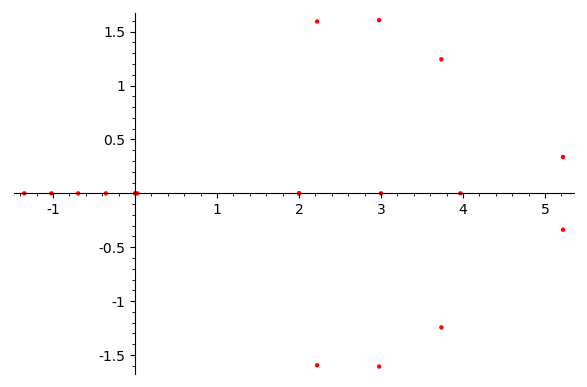

degree:  24
root count:  24
-----------------------------------------------------------------------------------
('polynomial #', 7)


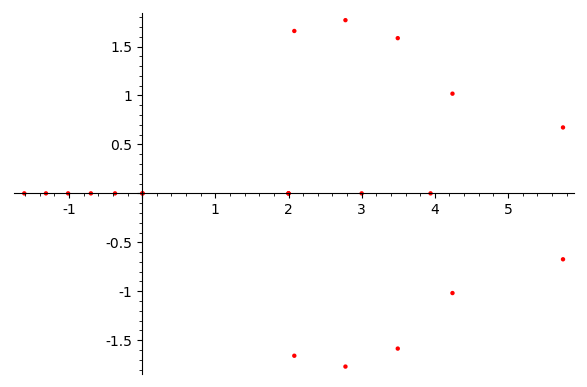

degree:  28
root count:  28
-----------------------------------------------------------------------------------
('polynomial #', 8)


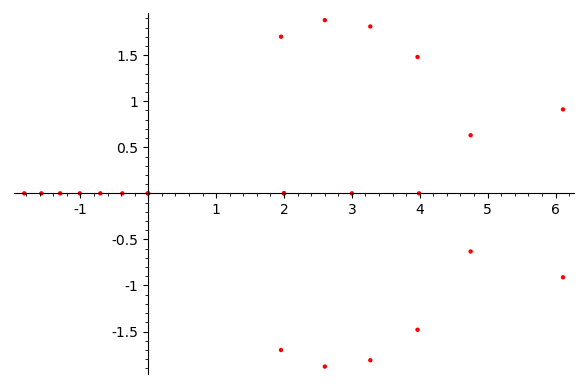

degree:  32
root count:  32
-----------------------------------------------------------------------------------
('polynomial #', 9)


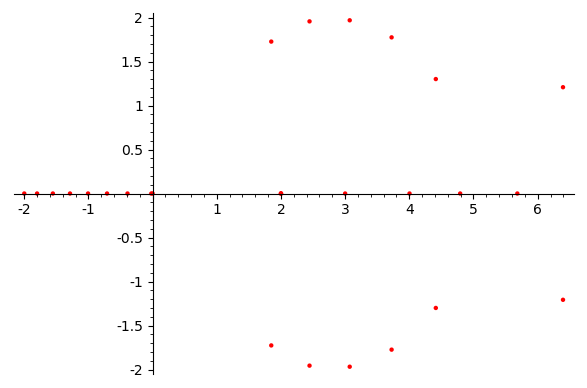

degree:  36
root count:  36
-----------------------------------------------------------------------------------
('polynomial #', 10)


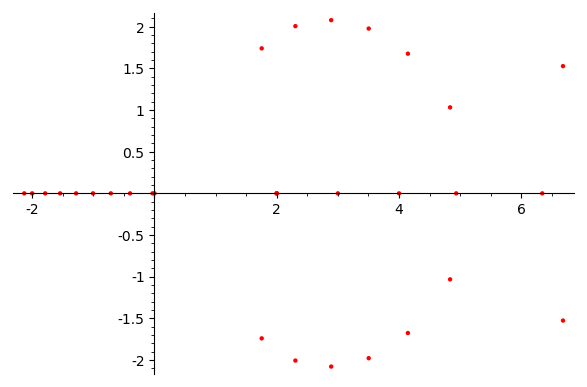

degree:  40
root count:  40
-----------------------------------------------------------------------------------
('polynomial #', 11)


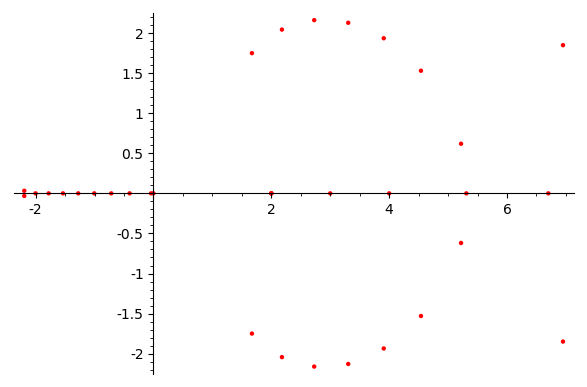

degree:  44
root count:  44
-----------------------------------------------------------------------------------
('polynomial #', 12)


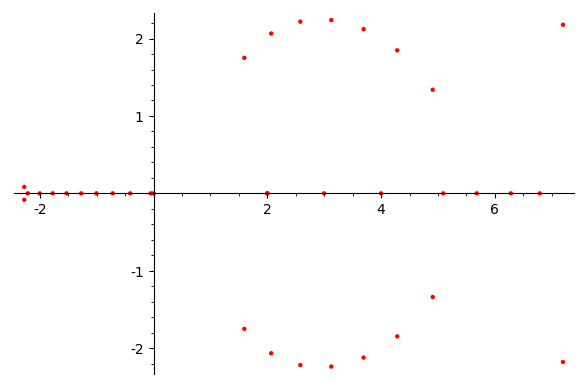

degree:  48
root count:  48
-----------------------------------------------------------------------------------
('polynomial #', 13)


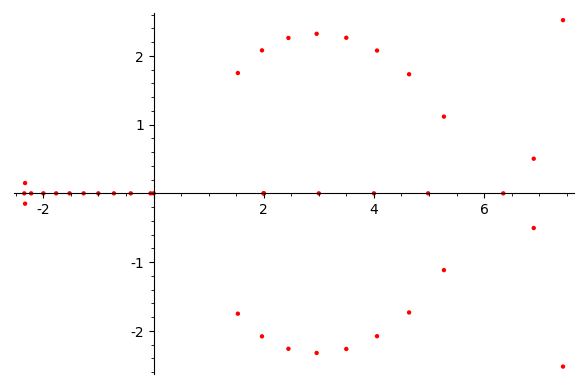

degree:  52
root count:  52
-----------------------------------------------------------------------------------
('polynomial #', 14)


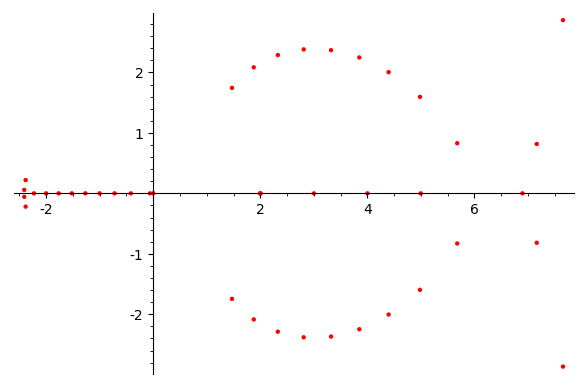

degree:  56
root count:  56
-----------------------------------------------------------------------------------
('polynomial #', 15)


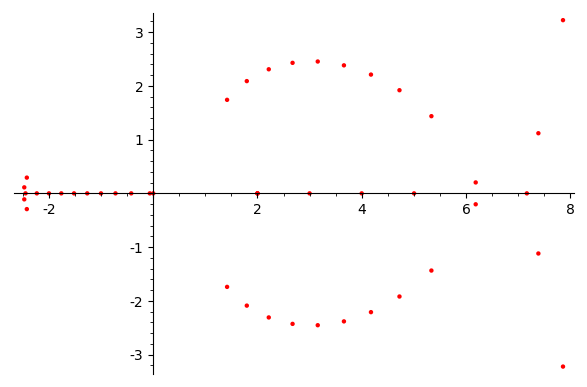

degree:  60
root count:  60
-----------------------------------------------------------------------------------
('polynomial #', 16)


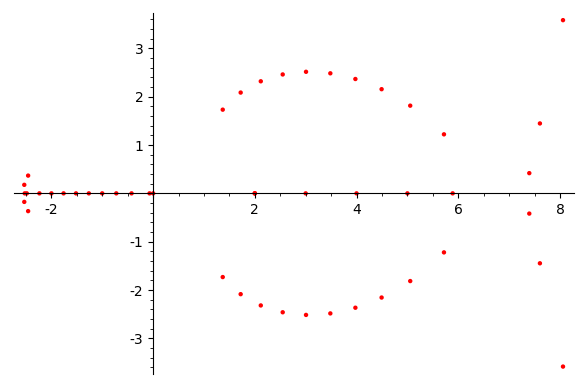

degree:  64
root count:  64
-----------------------------------------------------------------------------------
('polynomial #', 17)


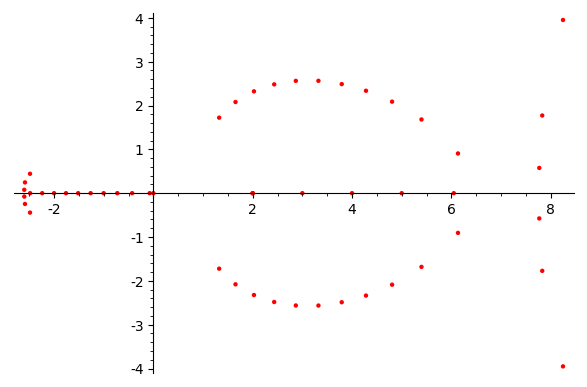

degree:  68
root count:  68
-----------------------------------------------------------------------------------
('polynomial #', 18)


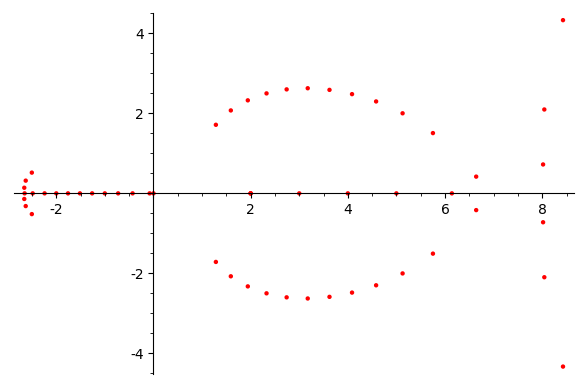

degree:  72
root count:  72
-----------------------------------------------------------------------------------
('polynomial #', 19)


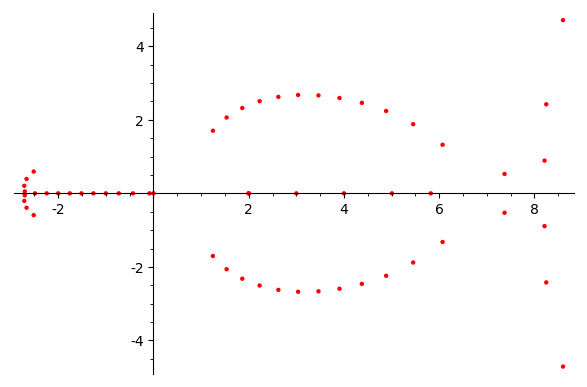

degree:  76
root count:  76
-----------------------------------------------------------------------------------
('polynomial #', 20)


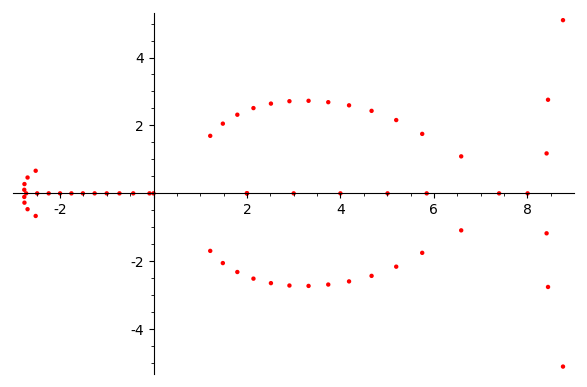

degree:  80
root count:  80
-----------------------------------------------------------------------------------
('polynomial #', 21)


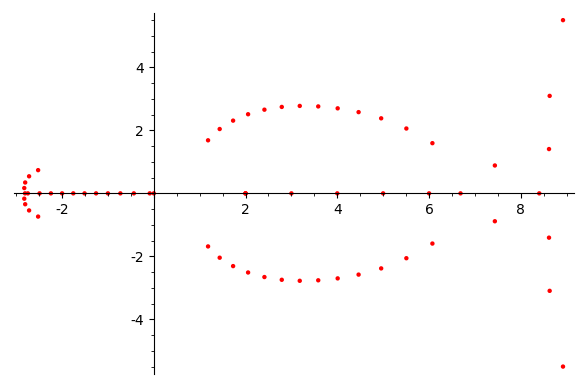

degree:  84
root count:  84
-----------------------------------------------------------------------------------
('polynomial #', 22)


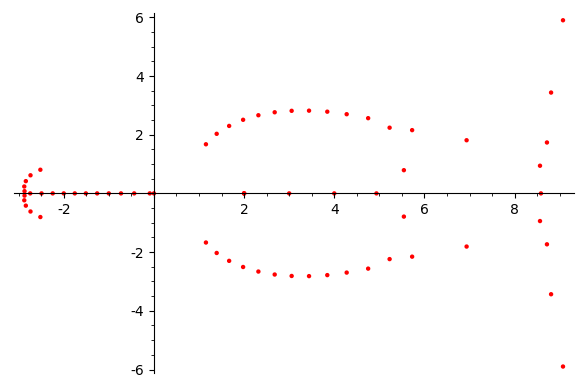

degree:  88
root count:  88
-----------------------------------------------------------------------------------
('polynomial #', 23)


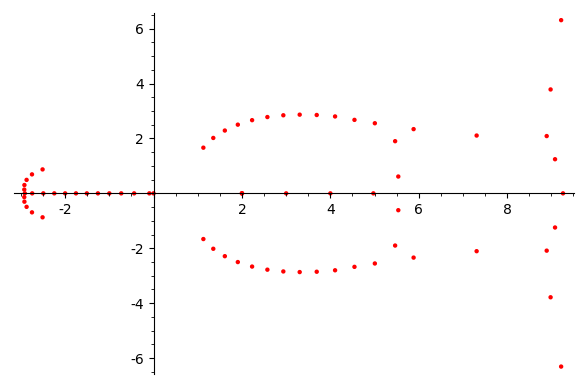

degree:  92
root count:  92


In [8]:
import pickle
rfile = open('/Users/barrybrent/run15aug21no1.txt','r')    # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lengths=[]
for k in [3..23]:
    points=[]
    n=s[k][0]
    print "-----------------------------------------------------------------------------------"
    print("polynomial #",n)
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    points=[]
    rootcount=0
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        root=[real(root),imaginary(root)]
        points=points+[root]
        rootcount=rootcount+mult
    rootplot=list_plot(points,color='red')
    show(rootplot)
    print "degree: ",poly.degree()
    print "root count: ",rootcount 

-----------------------------------------------------------------------------------
('polynomial #', 0)


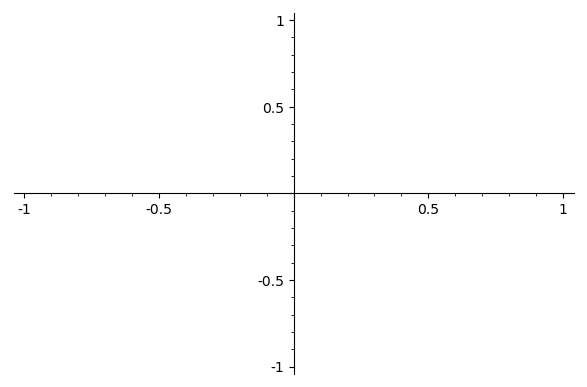

degree:  0
root count:  0
-----------------------------------------------------------------------------------
('polynomial #', 1)


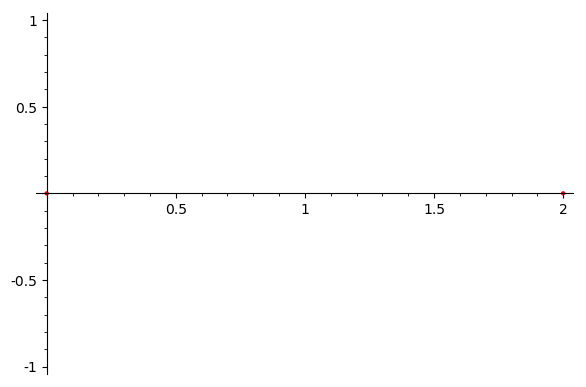

degree:  4
root count:  4
-----------------------------------------------------------------------------------
('polynomial #', 2)


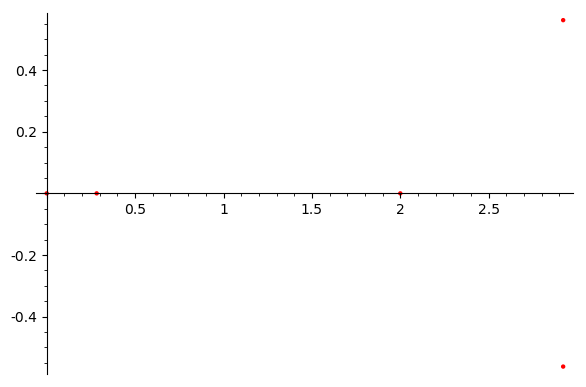

degree:  8
root count:  8
-----------------------------------------------------------------------------------
('polynomial #', 3)


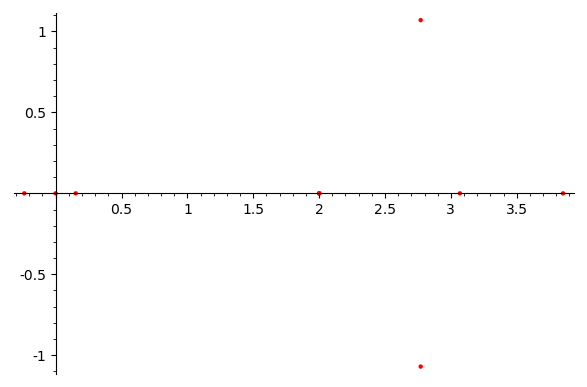

degree:  12
root count:  12
-----------------------------------------------------------------------------------
('polynomial #', 4)


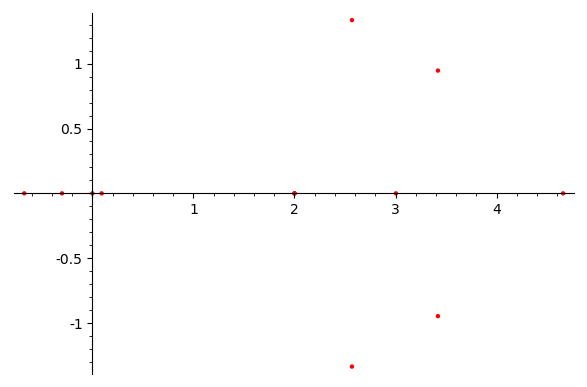

degree:  16
root count:  16
-----------------------------------------------------------------------------------
('polynomial #', 5)


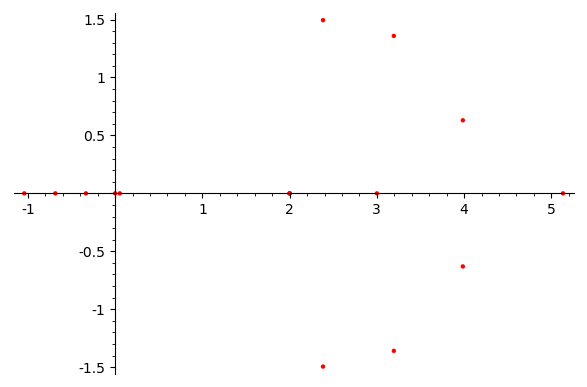

degree:  20
root count:  20
-----------------------------------------------------------------------------------
('polynomial #', 6)


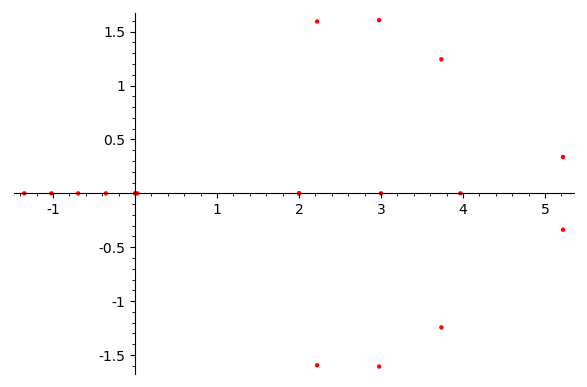

degree:  24
root count:  24
-----------------------------------------------------------------------------------
('polynomial #', 7)


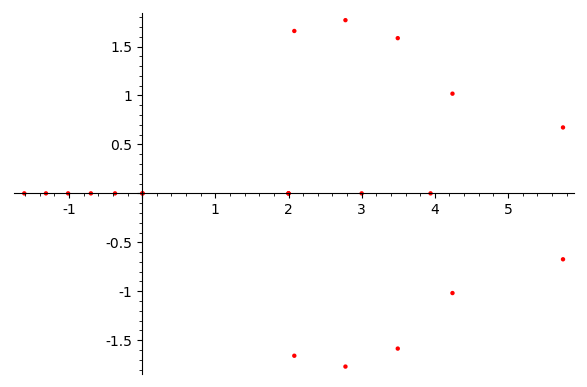

degree:  28
root count:  28
-----------------------------------------------------------------------------------
('polynomial #', 8)


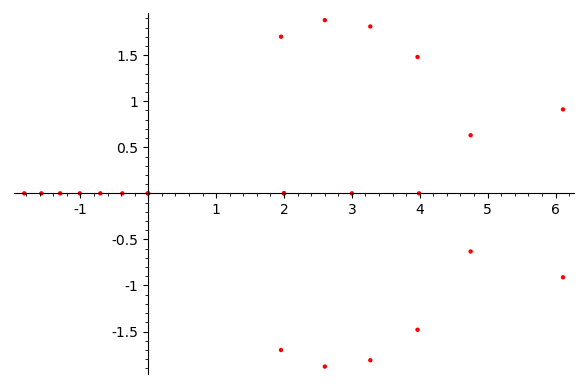

degree:  32
root count:  32
-----------------------------------------------------------------------------------
('polynomial #', 9)


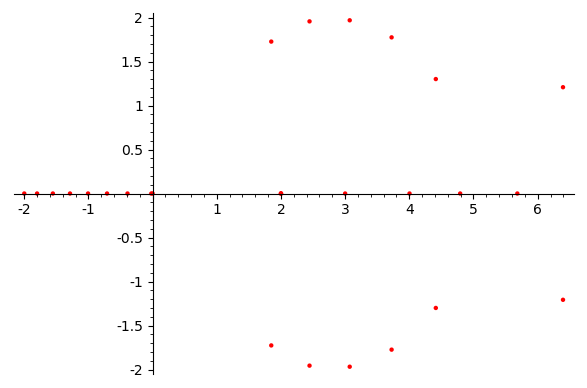

degree:  36
root count:  36
-----------------------------------------------------------------------------------
('polynomial #', 10)


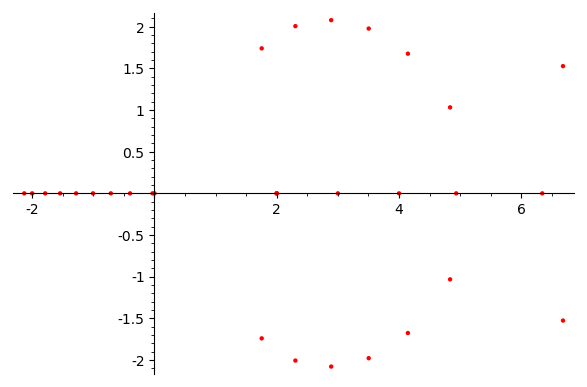

degree:  40
root count:  40
-----------------------------------------------------------------------------------
('polynomial #', 11)


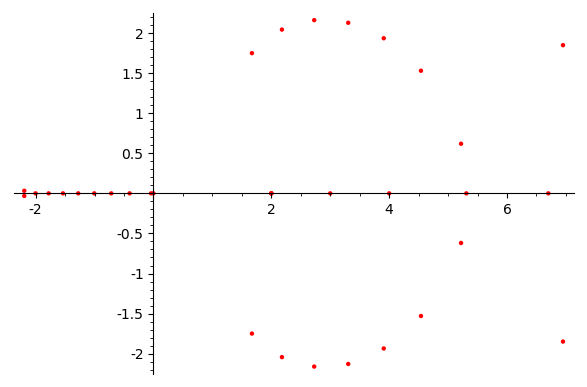

degree:  44
root count:  44
-----------------------------------------------------------------------------------
('polynomial #', 12)


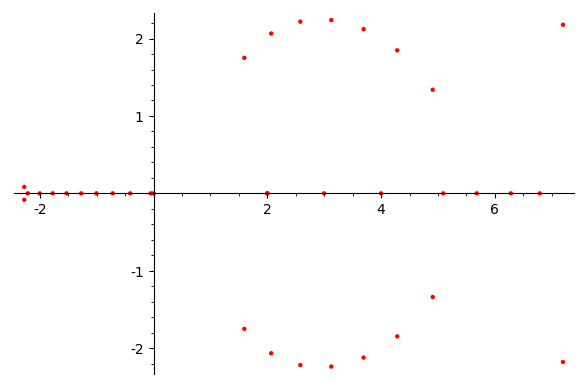

degree:  48
root count:  48
-----------------------------------------------------------------------------------
('polynomial #', 13)


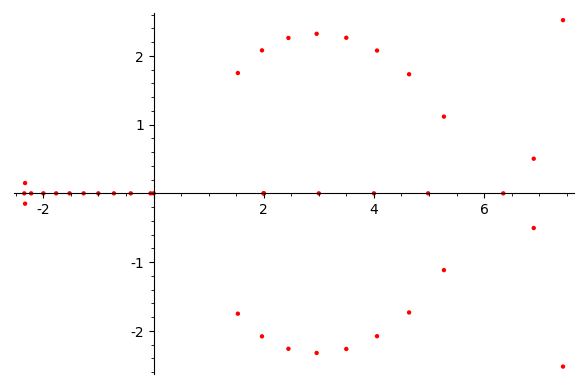

degree:  52
root count:  52
-----------------------------------------------------------------------------------
('polynomial #', 14)


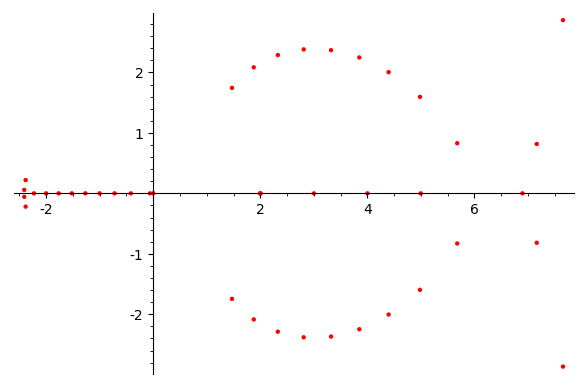

degree:  56
root count:  56
-----------------------------------------------------------------------------------
('polynomial #', 15)


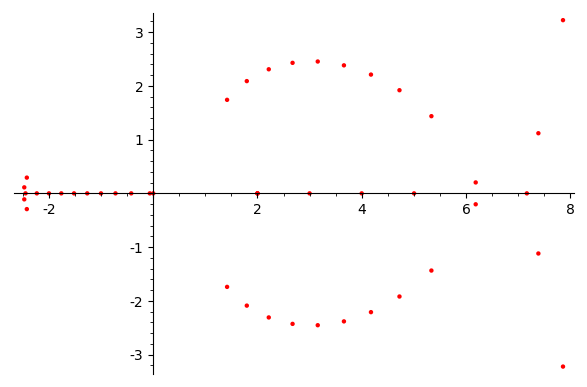

degree:  60
root count:  60
-----------------------------------------------------------------------------------
('polynomial #', 16)


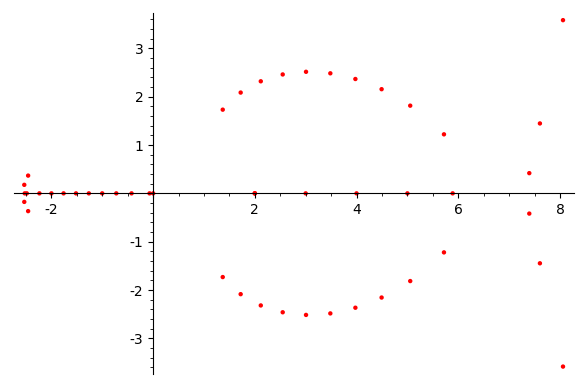

degree:  64
root count:  64
-----------------------------------------------------------------------------------
('polynomial #', 17)


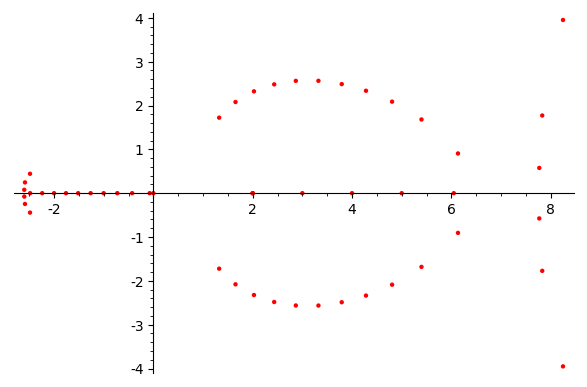

degree:  68
root count:  68
-----------------------------------------------------------------------------------
('polynomial #', 18)


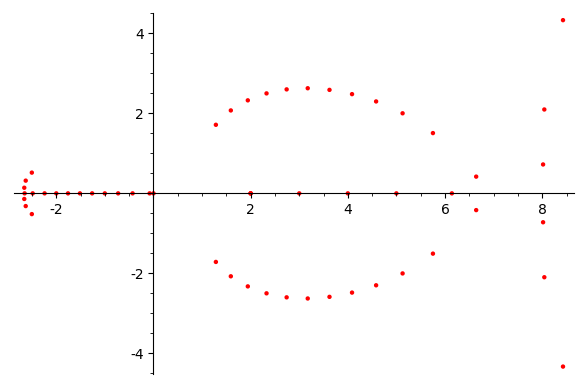

degree:  72
root count:  72
-----------------------------------------------------------------------------------
('polynomial #', 19)


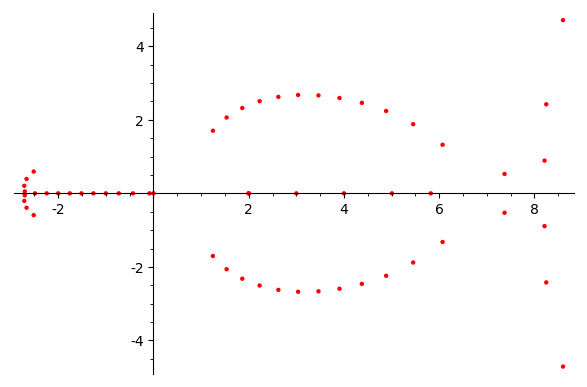

degree:  76
root count:  76
-----------------------------------------------------------------------------------
('polynomial #', 20)


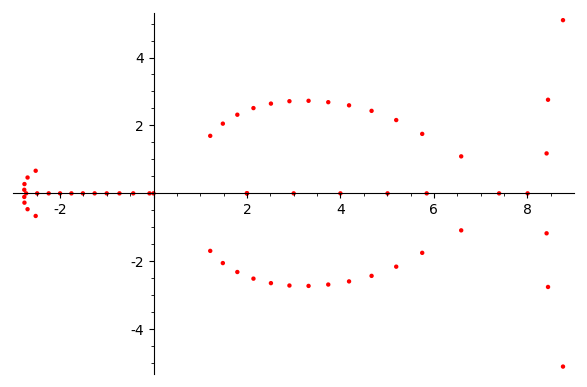

degree:  80
root count:  80
-----------------------------------------------------------------------------------
('polynomial #', 21)


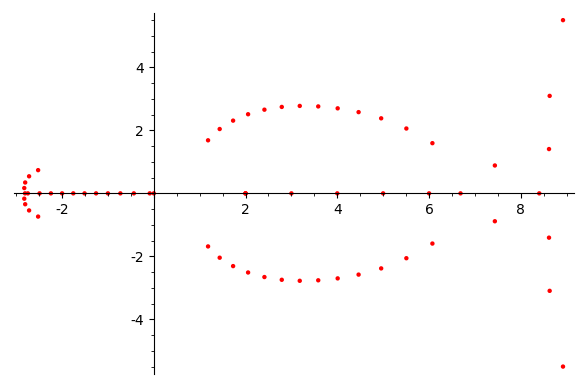

degree:  84
root count:  84
-----------------------------------------------------------------------------------
('polynomial #', 22)


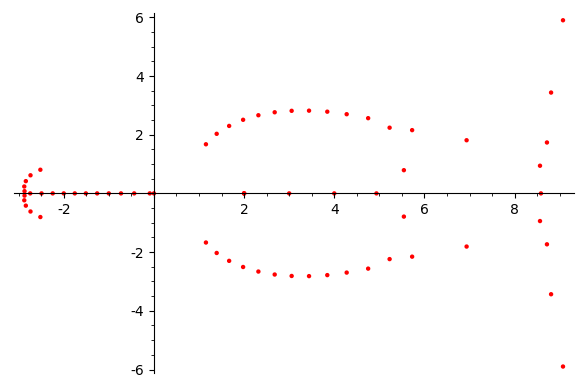

degree:  88
root count:  88
-----------------------------------------------------------------------------------
('polynomial #', 23)


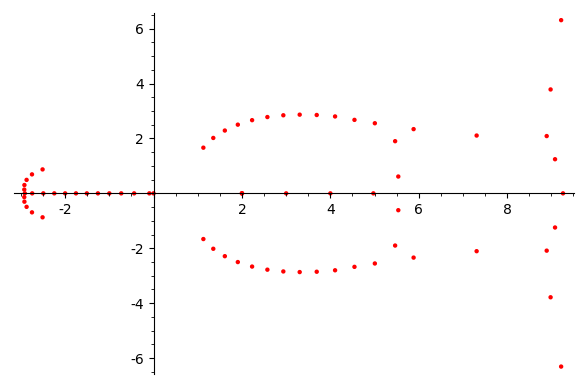

degree:  92
root count:  92
-----------------------------------------------------------------------------------
('polynomial #', 24)


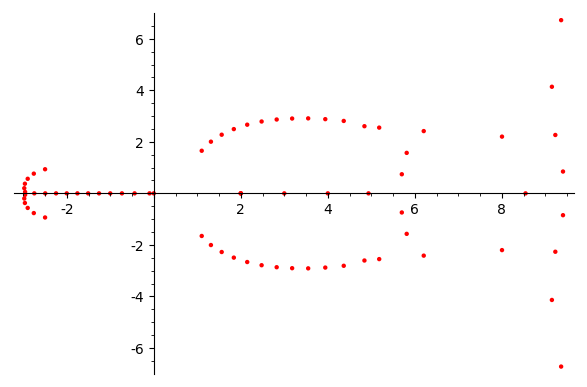

degree:  96
root count:  96
-----------------------------------------------------------------------------------
('polynomial #', 25)


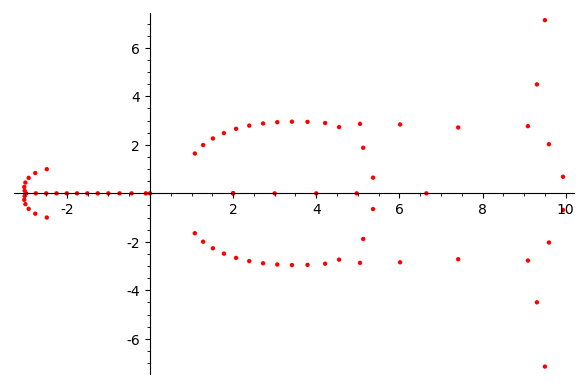

degree:  100
root count:  100
-----------------------------------------------------------------------------------
('polynomial #', 26)


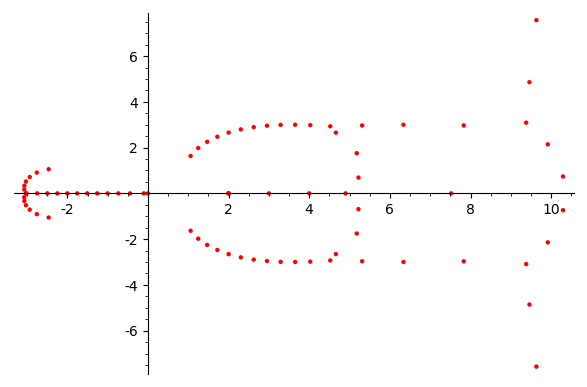

degree:  104
root count:  104
-----------------------------------------------------------------------------------
('polynomial #', 27)


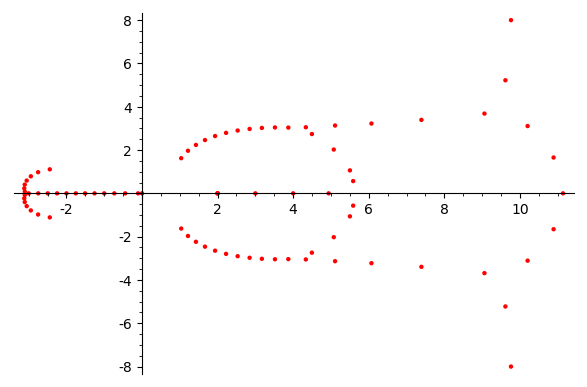

degree:  108
root count:  108
-----------------------------------------------------------------------------------
('polynomial #', 28)


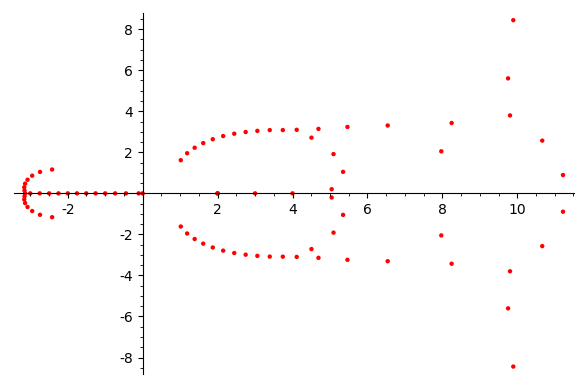

degree:  112
root count:  112
-----------------------------------------------------------------------------------
('polynomial #', 29)


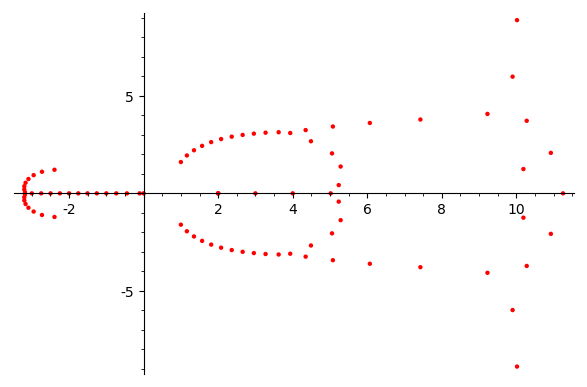

degree:  116
root count:  116
-----------------------------------------------------------------------------------
('polynomial #', 30)


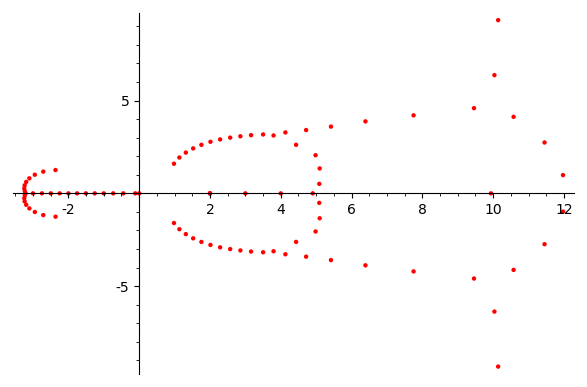

degree:  120
root count:  120
-----------------------------------------------------------------------------------
('polynomial #', 31)


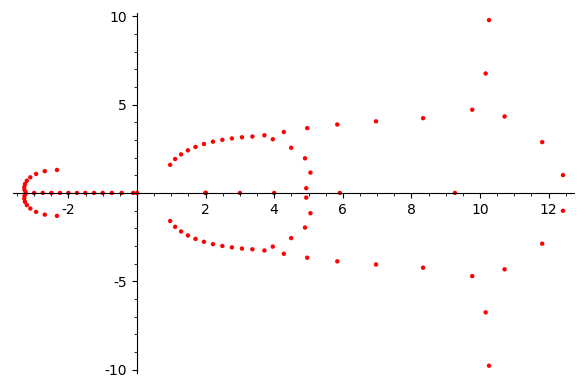

degree:  124
root count:  124
-----------------------------------------------------------------------------------
('polynomial #', 32)


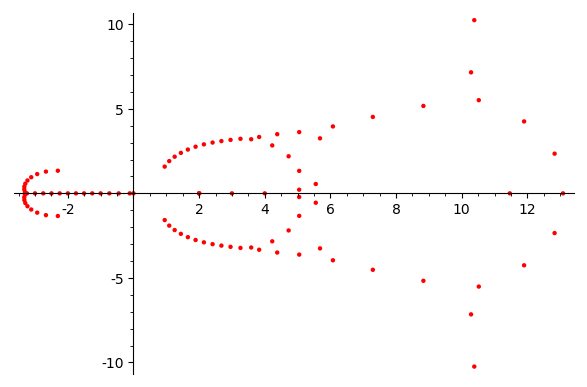

degree:  128
root count:  128
-----------------------------------------------------------------------------------
('polynomial #', 33)


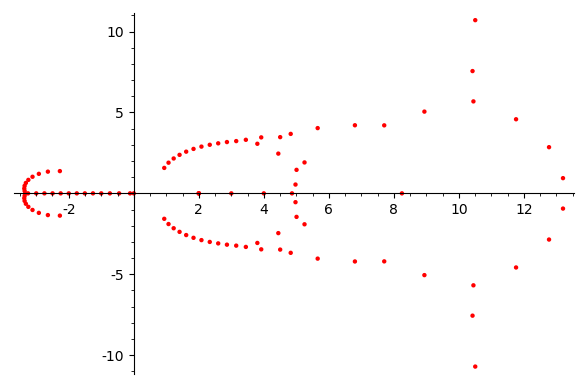

degree:  132
root count:  132


In [9]:
import pickle
rfile = open('/Users/barrybrent/run15aug21no1.txt','r')    # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lengths=[]
for k in [0..len(s)-1]:
    points=[]
    n=s[k][0]
    print "-----------------------------------------------------------------------------------"
    print("polynomial #",n)
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    points=[]
    rootcount=0
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        root=[real(root),imaginary(root)]
        points=points+[root]
        rootcount=rootcount+mult
    rootplot=list_plot(points,color='red')
    show(rootplot)
    print "degree: ",poly.degree()
    print "root count: ",rootcount 

In [15]:
import pickle
rfile = open('/Users/barrybrent/run15aug21no1.txt','r')    # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lengths=[]
for k in [1..5]:
    points=[]
    distances=[]
    n=s[k][0]
    print "-----------------------------------------------------------------------------------"
    print("polynomial #",n)
    poly=R(s[k][1])(3)
    print (poly,nieburTau(n+1))

-----------------------------------------------------------------------------------
('polynomial #', 1)
(-24, -24)
-----------------------------------------------------------------------------------
('polynomial #', 2)
(252, 252)
-----------------------------------------------------------------------------------
('polynomial #', 3)
(-1472, -1472)
-----------------------------------------------------------------------------------
('polynomial #', 4)
(4830, 4830)
-----------------------------------------------------------------------------------
('polynomial #', 5)
(-6048, -6048)


In [32]:
import pickle
rfile = open('/Users/barrybrent/run15aug21no1.txt','r')    # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lengths=[]
for k in [3..3]:
    points=[]
    distances=[]
    n=s[k][0]
    print "-----------------------------------------------------------------------------------"
    print("polynomial #",n)
    poly=C(s[k][1])
    print
    print poly
    

-----------------------------------------------------------------------------------
('polynomial #', 3)

-85.3333333333333*x^12 + 1568.00000000000*x^11 - 12298.6666666667*x^10 + 53312.0000000000*x^9 - 137448.296296296*x^8 + 208962.370370370*x^7 - 168751.407407407*x^6 + 46459.2592592593*x^5 + 13122.3703703704*x^4 - 2578.96296296296*x^3


-----------------------------------------------------------------------------------
('polynomial #', 2)


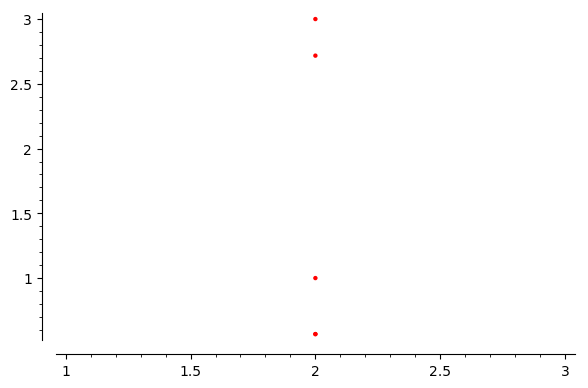

In [37]:
import pickle
rfile = open('/Users/barrybrent/run15aug21no1.txt','r')    # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lengths=[]
for k in [2..2]:
    points=[]
    distances=[]
    n=s[k][0]
    print "-----------------------------------------------------------------------------------"
    print("polynomial #",n)
    poly=C(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    points=[]
    rootcount=0
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        root=[real(root),imaginary(root)]
        zero=root[0]+I*root[1]
        distance=abs(zero-3)
        distances=distances+[[n,distance]]
    plot=list_plot(distances,color='red')
    show(plot)

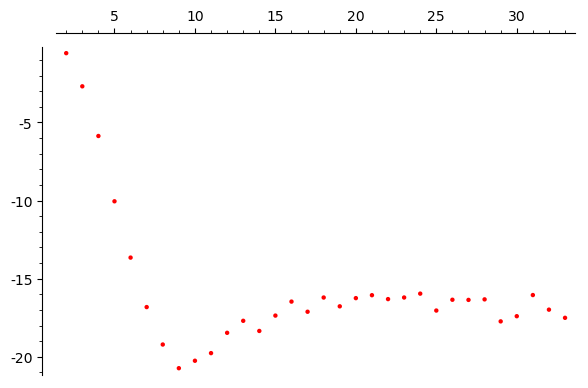

In [45]:
import pickle
rfile = open('/Users/barrybrent/run15aug21no1.txt','r')    # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lengths=[]
points=[]
for k in [2..len(s)-1]:
    distances=[]
    n=s[k][0]
    poly=C(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        root=[real(root),imaginary(root)]
        zero=root[0]+I*root[1]
        distance=abs(zero-3)
        distances=distances+[distance]
    minimum=min(distances)
    points=points+[[n,log(minimum)]]
plot=list_plot(points,color='red')
show(plot)